In [128]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(1)

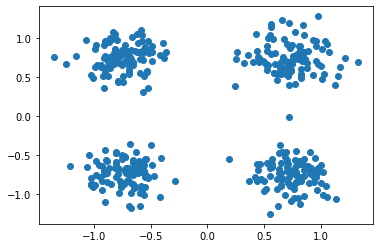

In [129]:
X = np.load("./data_clustering.npy")
plt.scatter(X[:,0], X[:,1])
plt.show()

In [130]:
# Randomly initialize a set of 4 centroids
def initialize_parameters(m, X):
    C = X[np.random.choice(X.shape[0], m)]
    return C

C = initialize_parameters(4, X)
print(C)

[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]


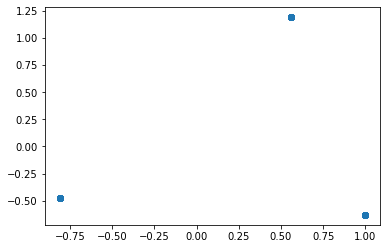

In [131]:
# E-step: for each sample in X, derive the centroid that is closest to it
def E_step(C, X):
    l=np.zeros_like(X)
    for i in range(X.shape[0]):
        u=np.zeros((C.shape[0]))
        for j in range(u.shape[0]):
            u[j]=np.linalg.norm(X[i,:]-C[j,:],ord=2)
        for k in range(u.shape[0]):
            if u[k]==np.amax(u,axis=0):
                l[i,:]=C[k,:]
        u=np.zeros((C.shape[0]))
    return l

L = E_step(C, X)
plt.scatter(L[:, 0], L[:, 1])
plt.show()    

In [132]:
# Update centroids
def M_step(C, X, L):
    new_centroid=np.zeros_like(C)
    i = 0
    while i < C.shape[0]:
        M=np.empty((0,X.shape[1]))
        for j in range(L.shape[0]):
            if np.array_equal(C[i,:],L[j,:]):
                M1=np.append(M,X[j:j+1,:],axis=0) #ensure X[j,:] is exactly appended into M
                M=M1.copy()
                new_centroid[i,:]=np.mean(M1,axis=0)
        i+=1
    return new_centroid
                
print('Before:')
print(C)
print('\nAfter:')
new_C = M_step(C, X, L)
print(new_C)

Before:
[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]

After:
[[-3.88274423e-04 -7.46481725e-01]
 [-7.49653510e-01  7.53109204e-01]
 [ 7.27096945e-01  7.33634302e-01]
 [ 0.00000000e+00  0.00000000e+00]]


Initial Parameters:
[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]

Final Parameters:
[[ 0.72539561  0.75302836]
 [-0.73312486 -0.73655558]
 [ 0.74859936 -0.74619961]
 [-0.74965351  0.7531092 ]]


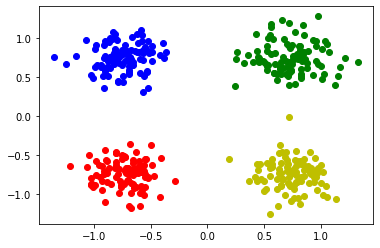

In [135]:
# Complete K-means algorithm
def kmeans(X, m, i):
    L = np.zeros(X.shape)
    C = initialize_parameters(m, X)
    while i > 0:
        L = E_step(C, X)
        C = M_step(C, X, L)
        i -= 1
    #the data points and cluster centroids are paired
    #to match the value in L and C, do E_step one more time
    L = E_step(C, X)
    return C, L


C_final, L_final = kmeans(X, 4, 20)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,0], cluster[:,1], c=colours[i])
plt.show()

C:\Users\rog\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


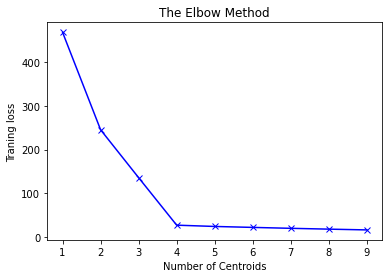

In [ ]:
# Elbow method
from sklearn.cluster import KMeans
#For number of centorids from 1 to 10, calculate their training loss
Traning_loss = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    Traning_loss.append(model.inertia_)
#Plot training loss
plt.plot(K, Traning_loss, color='b',marker='x',linestyle='-')
plt.xlabel('Number of Centroids')
plt.ylabel('Traning loss')
plt.title('The Elbow Method')
plt.show()